In [43]:
import torch
import matplotlib.pyplot as plt
import tqdm
import utils
import dataloaders
import torchvision
from trainer import Trainer
import numpy as np

### Model Definition

In [44]:
torch.random.manual_seed(0)

class FullyConnectedModel(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # We are using 28x28 greyscale images.
        num_input_nodes = 28*28
        # Number of classes in the MNIST dataset
        num_classes = 10

        # Define our model
        self.classifier = torch.nn.Sequential(
         torch.nn.Linear(num_input_nodes, num_classes),
        )
    
    def forward(self, x):
        # Runs a forward pass on the images
        x = x.view(-1, 28*28)
        out = self.classifier(x)
        return out
    
class TwoLayerModel(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # We are using 28x28 greyscale images.
        num_1_nodes = 28*28
        num_2_nodes = 64
        # Number of classes in the MNIST dataset
        num_classes = 10

        # Define our model
        self.layer1 = torch.nn.Sequential(torch.nn.Linear(num_1_nodes, num_2_nodes), torch.nn.ReLU())
        self.layer2 = torch.nn.Sequential(torch.nn.Linear(num_2_nodes, num_classes),)
        
    def forward(self, x):
        # Runs a forward pass on the images
        x = x.view(-1, 28*28)
        x = self.layer1(x)
        x = self.layer2(x)
        return x

### Hyperparameters & Loss function

In [45]:
# Hyperparameters
batch_size = 64
learning_rate = .0192 # 1 #.0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Model definition
model = TwoLayerModel()
#model = FullyConnectedModel()
# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

image_transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize([0.5], [0.25])])

dataloader_train, dataloader_val = dataloaders.load_dataset(batch_size, image_transform=image_transform)

### Train model

In [46]:
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_val=dataloader_val,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, val_loss_dict = trainer.train(num_epochs)

Training epoch 4: 100%|██████████████████████████████████████████████████████████████| 938/938 [00:34<00:00, 27.12it/s]


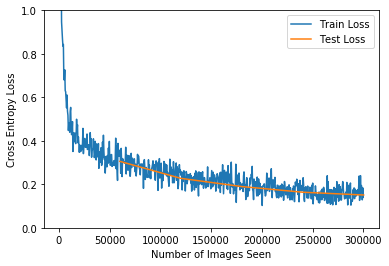

Final Test Cross Entropy Loss: 0.1508792703229768. Final Test accuracy: 0.9541


In [47]:

# Plot loss
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(val_loss_dict, label="Test Loss")
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Number of Images Seen")
plt.ylabel("Cross Entropy Loss")
plt.savefig("training_loss.png")

plt.show()
torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_val, model, loss_function)
print(f"Final Test Cross Entropy Loss: {final_loss}. Final Test accuracy: {final_acc}")

In [48]:
weight = next(model.classifier. children ()). weight.data


fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(9, 6), subplot_kw={'xticks': [], 'yticks': []})

for counter, ax in enumerate(axs.flat):
    if counter < 10:
        w_cl = weight[counter,:]
        #print(w_cl.size())
        ax.imshow(w_cl.view(28,28), cmap='viridis')
        ax.set_title(str(counter))

plt.tight_layout()
plt.show()



AttributeError: 'TwoLayerModel' object has no attribute 'classifier'